In [1]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

## Data Collection, Analysis and processing

In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [8]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

- X_train contains 60000 grey scale image of size 28*28

In [9]:
Y_train.shape, Y_test.shape

((60000,), (10000,))

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [11]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

0 --> T-shirt/top</br>
1 --> Trouser</br>
2 --> Pullover</br>
3 --> Dress</br>
4 --> Coat</br>
5 --> Sandal</br>
6 --> Shirt</br>
7 --> Sneaker</br>
8 --> Bag</br>
9 --> Ankle boot</br>

In [12]:
# Create a list for the class name
target_classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
                  'Sneaker', 'Bag', 'Ankle boot']
target_classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [72]:
# Function to display images
def display(X, index):
    plt.imshow(X[index])

Ankle boot


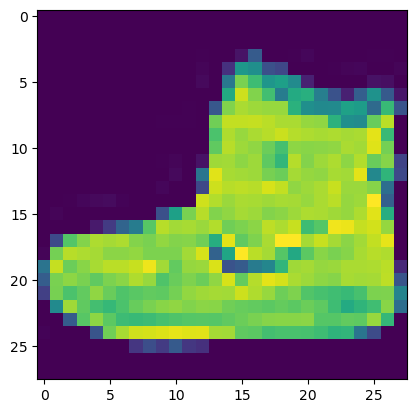

In [73]:
print(target_classes[Y_train[0]])
display(X_train, 0)


T-shirt/top


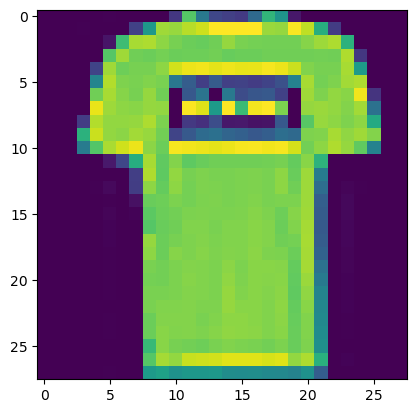

In [74]:
print(target_classes[Y_train[1]])
display(X_train, 1)


Pullover


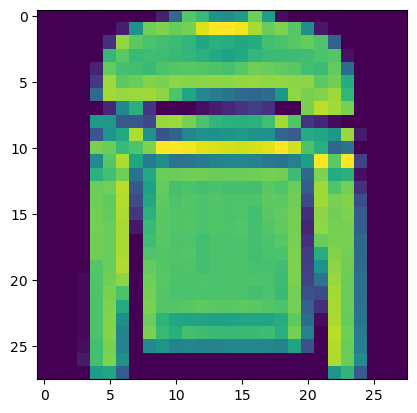

In [61]:
print(target_classes[Y_train[5]])
display(5)


### Scaling the values of X

In [30]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [31]:
X_train_scaled[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Model Building using Artificial Neural Networks

In [44]:
# Building the model
model_ann = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(2000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model_ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 3000)              2355000   
                                                                 
 dense_4 (Dense)             (None, 2000)              6002000   
                                                                 
 dense_5 (Dense)             (None, 10)                20010     
                                                                 
Total params: 8377010 (31.96 MB)
Trainable params: 8377010 (31.96 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
# compiling the model
model_ann.compile(
    optimizer = 'SGD',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)


In [46]:
# Training the model
model_ann.fit(X_train_scaled, Y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.6388 - accuracy: 0.7925
Epoch 2/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.4540 - accuracy: 0.8435
Epoch 3/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.4133 - accuracy: 0.8573
Epoch 4/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.3856 - accuracy: 0.8650
Epoch 5/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.3664 - accuracy: 0.8722


In [47]:
# Model EValuation using test data
model_ann.evaluate(X_test_scaled, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3943 - accuracy: 0.8614


[0.39431124925613403, 0.8614000082015991]

In [48]:
# prediction
prediction_ann = model_ann.predict(X_test)
prediction_ann

313/313 [==============================] - 2s 5ms/step


array([[0., 0., 0., ..., 1., 1., 1.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.]], dtype=float32)

In [49]:
Y_pred_ann = np.argmax(prediction_ann, axis =1)
Y_pred_ann

array([5, 0, 0, ..., 0, 1, 5])

In [50]:
Y_pred_ann[:10]

array([5, 0, 0, 1, 0, 0, 0, 2, 5, 5])

In [51]:
Y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

Y test class:  Ankle boot
Y predicted class:  Sandal


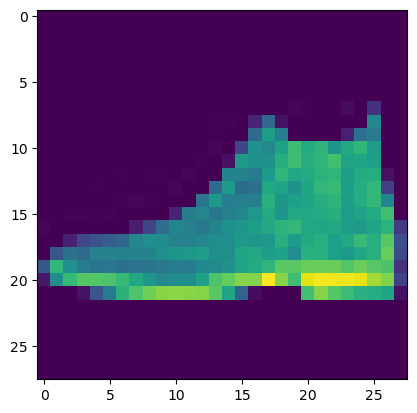

In [80]:
print("Y test class: ", target_classes[Y_test[0]])
print("Y predicted class: ", target_classes[Y_pred_ann[0]])
display(X_test, 0)

- We can see the difference in the values of Y_test and Y_predict

## Model Building using CNN

In [53]:
model_cnn = keras.Sequential([
    # Cnn Layer
    # Convoluation layer
    keras.layers.Conv2D(filters=28, kernel_size=(3,3), activation='relu', input_shape = (28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)), # Pooling Layer
    # Convoluation layer
    keras.layers.Conv2D(filters=28, kernel_size=(3,3), activation='relu', input_shape = (28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)), # Pooling Layer
    
    # Dense Layer
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10, activation= 'softmax')
])

model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 28)        7084      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 28)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 700)               0         
                                                                 
 dense_9 (Dense)             (None, 64)               

In [54]:
# Compile Model 
model_cnn.compile(
    optimizer='SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# Training the model
model_cnn.fit(X_train_scaled,Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.9409 - accuracy: 0.6559
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5622 - accuracy: 0.7891
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4814 - accuracy: 0.8214
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4351 - accuracy: 0.8399
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4054 - accuracy: 0.8519


In [55]:
# Evaluate using Test Data
model_cnn.evaluate(X_test_scaled, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4129 - accuracy: 0.8514


[0.41294071078300476, 0.8514000177383423]

In [56]:
# Checking Prediction 
prediction_cnn = model_cnn.predict(X_test_scaled)
prediction_cnn

313/313 [==============================] - 1s 2ms/step


array([[6.0155021e-06, 2.7404643e-05, 8.8727347e-06, ..., 6.8336241e-02,
        3.8232831e-03, 9.1442782e-01],
       [9.2516106e-04, 1.1948046e-06, 9.8818612e-01, ..., 5.3135068e-08,
        4.7040892e-05, 1.9904562e-07],
       [1.1712200e-06, 9.9999452e-01, 6.8828177e-07, ..., 3.1920402e-07,
        1.3301305e-07, 5.7288776e-08],
       ...,
       [2.0926116e-02, 2.2870522e-06, 4.7042890e-04, ..., 5.6907626e-05,
        9.6291119e-01, 9.2672082e-08],
       [3.8309157e-05, 9.9637705e-01, 1.8047158e-05, ..., 6.1258243e-06,
        3.4310528e-06, 1.0933728e-05],
       [6.9324131e-04, 3.0221202e-04, 1.9004714e-03, ..., 1.7413880e-01,
        3.0952943e-02, 1.4974426e-03]], dtype=float32)

In [59]:
Y_pred_cnn = np.argmax(prediction_cnn, axis = 1)
Y_pred_cnn[:5]

array([9, 2, 1, 1, 6])

In [60]:
Y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

- Now the we can see the result is almost similar

Y test class:  Pullover
Y predicted class:  Pullover


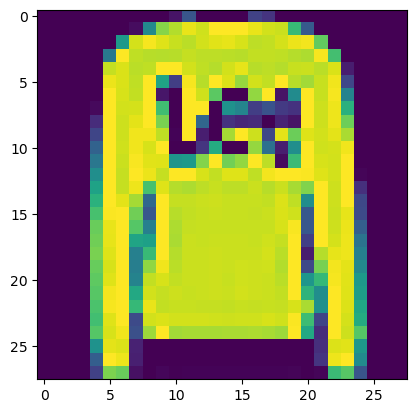

In [77]:
print("Y test class: ", target_classes[Y_test[1]])
print("Y predicted class: ", target_classes[Y_pred_cnn[1]])
display(X_test, 1)

Y test class:  Dress
Y predicted class:  Dress


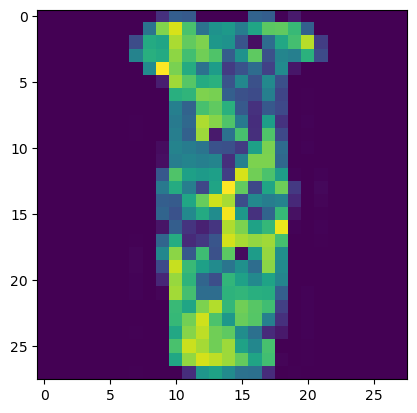

In [78]:
print("Y test class: ", target_classes[Y_test[100]])
print("Y predicted class: ", target_classes[Y_pred_cnn[100]])
display(X_test, 100)